In [1]:
print("welcome to data analysis.")

welcome to data analysis.


In [2]:
run ./scripts/analysis_scripts.py

In [3]:
minimum_path = './computational-results-minimum/results_datatable'
additive_faces_path = './computational-results-additive-faces/results_datatable'
objective_zero_path = './computational-results-objective-zero/results_datatable'
objective_one_percent_path = './computational-results-objective-one-percent/results_datatable/'

In [4]:
## delta_pi_minimum results

# path for computational results.
path = minimum_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [39]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),4.762538,12.013101,4.361064,17.773702,12.413705,3.837699,16.084056,13.467165,9.961226,1404.594462,3.186906,4.842882,3.160555,10.46402


In [40]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),14.857177,26.62041,13.115981,38.920479,27.732581,10.854959,35.267583,29.776078,34.879223,1406.234328,9.108718,14.809175,9.420428,23.787711


In [41]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),40.264891,60.645859,33.520716,86.11601,63.482008,25.316356,77.629048,67.047947,92.685507,1414.812584,22.190271,37.941782,24.364911,55.699114


In [42]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

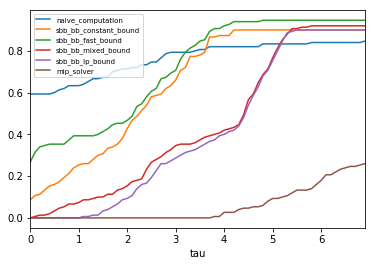

In [54]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_min.pdf')

In [55]:
## objective_zero results

# path for computational results.
path = objective_zero_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [56]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),6.577768,17.692351,5.564841,19.534646,19.282658,4.424418,17.499977,19.0278,9.915928,1559.989193,4.519433,5.45582,4.88518,17.718473


In [57]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),21.305583,39.977065,17.616025,44.336999,44.052362,13.153604,39.726109,43.661839,34.810922,1561.679693,13.406166,17.301143,14.779838,40.093675


In [58]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),58.653967,89.54866,46.407343,100.29507,100.124323,32.483486,89.314752,99.30851,92.734738,1570.539864,33.000979,45.707461,37.694423,90.148411


In [59]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

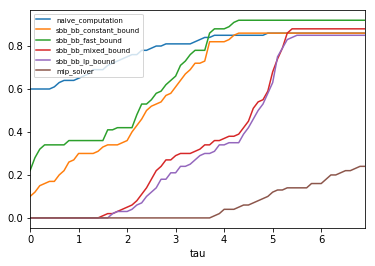

In [60]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_obg0.pdf')

In [61]:
## objective_one_percent results

# path for computational results.
path = objective_one_percent_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [62]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),1.62666,2.336079,1.521992,4.182796,4.168604,0.805614,2.290765,4.060389,10.012115,722.364194,0.813167,1.50516,0.833517,2.293473


In [63]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),3.057401,3.604094,2.83305,7.190262,7.214696,1.187027,3.554908,7.013627,35.021041,726.103192,1.202389,2.776759,1.239222,3.552383


In [64]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),4.039331,4.812806,3.687491,10.434747,10.579108,1.326684,4.773459,10.215928,93.127606,736.692963,1.345535,3.599123,1.392887,4.750489


In [65]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

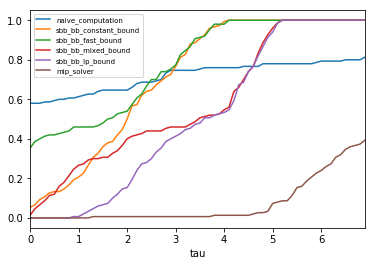

In [66]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 2,prop={'size': 7})
plt.savefig('pp_obg1.pdf')

In [67]:
## additive_faces results

# path for computational results.
path = additive_faces_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

In [68]:
# print shifted geometric mean table with shift 1s.
shifted_gmean_df(df, s=1)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=1),7.329666,20.804736,6.997128,21.679598,21.646375,7.237729,20.844115,20.823675,6.560573,7.389603,6.916779,7.588034,20.520977


In [69]:
# print shifted geometric mean table with shift 10s.
shifted_gmean_df(df, s=10)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=10),23.993129,46.400507,23.221973,47.978648,48.16309,23.660245,46.626903,47.193386,21.319798,24.049994,23.074846,24.39737,45.868477


In [70]:
# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),67.273115,104.887659,65.700066,107.691408,108.127611,66.473635,105.320937,106.720331,54.384792,67.244517,65.458744,67.720415,103.759816


In [71]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_fast_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

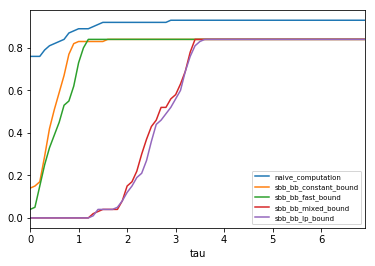

In [75]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc = 4,prop={'size': 7})
plt.savefig('pp_add.pdf')

In [4]:
path = minimum_path
df = generate_dataframe(path, metric = 'memory', stats = 'max', time_out = 3600)

In [21]:
max(df[df['naive_computation']!='TimeOut']['naive_computation'])

0.197479248046875

(array([37.,  5.,  0.,  1.,  3.,  1.,  1.,  0.,  1.,  1.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.20062637, 0.33946716, 0.47830795, 0.61714874, 0.75598953,
        0.89483032, 1.03367111, 1.1725119 , 1.31135269, 1.45019348,
        1.58903427, 1.72787506, 1.86671585, 2.00555664, 2.14439743,
        2.28323822, 2.42207901, 2.5609198 , 2.69976059, 2.83860138,
        2.97744217, 3.11628296, 3.25512375, 3.39396454, 3.53280533,
        3.67164612]),
 <a list of 25 Patch objects>)

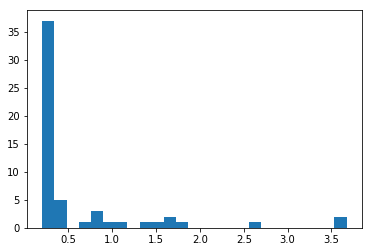

In [16]:
plt.hist(list(df[(df['sbb_bb_fast_bound']!='TimeOut')&(df['sbb_bb_fast_bound']>=0.2)]['sbb_bb_fast_bound']), bins='auto')

(array([28.,  8.,  6.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.19713974, 0.25580718, 0.31447463, 0.37314207, 0.43180951,
        0.49047696, 0.5491444 , 0.60781184, 0.66647928, 0.72514673,
        0.78381417, 0.84248161, 0.90114906, 0.9598165 , 1.01848394,
        1.07715139, 1.13581883, 1.19448627, 1.25315371, 1.31182116,
        1.3704886 , 1.42915604, 1.48782349]),
 <a list of 22 Patch objects>)

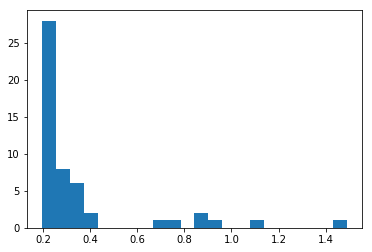

In [17]:
plt.hist(list(df[(df['sbb_bb_constant_bound']!='TimeOut')&(df['sbb_bb_constant_bound']>=0.2)]['sbb_bb_fast_bound']), bins='auto')

In [12]:
## return all results for addive_faces results

# path for computational results.
path = additive_faces_path

In [13]:
# time table
generate_dataframe(path, metric = 'time', stats='arithmetic_mean', time_out = 3600)

,instances,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,extreme_49_2s,10.2778,116.783,8.60559,121.261,128.497,11.4849,116.383,115.431,12.633680,11.6613,8.29018,13.0685,101.642
1,extreme_34_2s,31.0705,320.16,27.6971,349.042,338.039,33.1676,314.292,349.652,13.871689,36.6365,25.5815,41.8659,307.494
2,extreme_27,0.0948102,0.729384,0.0881288,0.792285,0.722938,0.104023,0.79014,0.732564,0.058221,0.107111,0.0885222,0.112057,0.791251
3,extreme_9,0.0774168,0.520628,0.0734575,0.534036,0.470289,0.0830431,0.465639,0.489428,0.052381,0.086509,0.0755395,0.089562,0.526174
4,extreme_45_2s,OutOfMemory,OutOfMemory,OutOfMemory,3600,3600,OutOfMemory,OutOfMemory,OutOfMemory,3600.000000,OutOfMemory,OutOfMemory,OutOfMemory,3600
5,extreme_38_2s,OutOfMemory,3600,OutOfMemory,3600,3600,OutOfMemory,3600,OutOfMemory,3600.000000,OutOfMemory,OutOfMemory,OutOfMemory,OutOfMemory
6,extreme_8,0.0665025,0.383492,0.0659044,0.392854,0.371457,0.0728377,0.34146,0.264331,0.051776,0.0731805,0.0643368,0.0768901,0.357139
7,extreme_26,0.063445,0.305278,0.0608045,0.306832,0.282914,0.0712969,0.339766,0.308379,0.050062,0.0672691,0.0622601,0.0735354,0.336449
8,extreme_18,0.172079,1.93947,0.156129,2.0472,2.01739,0.196332,1.90563,1.86008,0.078496,0.199554,0.14059,0.239771,1.98043
9,extreme_30,0.463708,4.95742,0.396598,5.63882,4.94574,0.433919,5.37055,5.24899,0.178553,0.432641,0.392499,0.494858,5.01364


In [14]:
# memory table
generate_dataframe(path, metric = 'memory', stats='max')

,instances,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_fast_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_bfs_fast_bound,sbb_dfs_constant_bound,sbb_bb_fast_bound,sbb_bb_mixed_bound
0,extreme_49_2s,0.355282,0.355808,0.352253,0.36372,0.38485,0.355003,0.337952,0.382996,0.192986,0.353992,0.352745,0.357746,0.371502
1,extreme_34_2s,0.697025,0.736572,0.687256,0.733627,0.734203,0.688732,0.727234,0.756283,0.220154,0.713364,0.691925,0.721561,0.751225
2,extreme_27,0.194656,0.203846,0.195084,0.201653,0.204201,0.194202,0.2038,0.2047,0.19442,0.194656,0.194569,0.193954,0.203556
3,extreme_9,0.188103,0.204113,0.19437,0.191933,0.203979,0.195133,0.20393,0.203773,0.194519,0.194706,0.194553,0.191978,0.203766
4,extreme_45_2s,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,TimeOut
5,extreme_38_2s,OutOfMemory,TimeOut,OutOfMemory,TimeOut,TimeOut,OutOfMemory,TimeOut,OutOfMemory,TimeOut,OutOfMemory,OutOfMemory,OutOfMemory,OutOfMemory
6,extreme_8,0.194557,0.203838,0.194725,0.204521,0.204178,0.194527,0.203846,0.204819,0.19455,0.191853,0.191704,0.194294,0.205471
7,extreme_26,0.189545,0.203754,0.194672,0.203922,0.204773,0.19532,0.204689,0.199627,0.194469,0.194469,0.194614,0.194775,0.204243
8,extreme_18,0.188511,0.20578,0.195187,0.205853,0.20607,0.195007,0.20594,0.205582,0.194572,0.194614,0.194679,0.195354,0.205933
9,extreme_30,0.191002,0.21022,0.200546,0.208614,0.210564,0.198696,0.210598,0.211765,0.19455,0.19949,0.201126,0.199387,0.209324
